# Experiments
## Databases

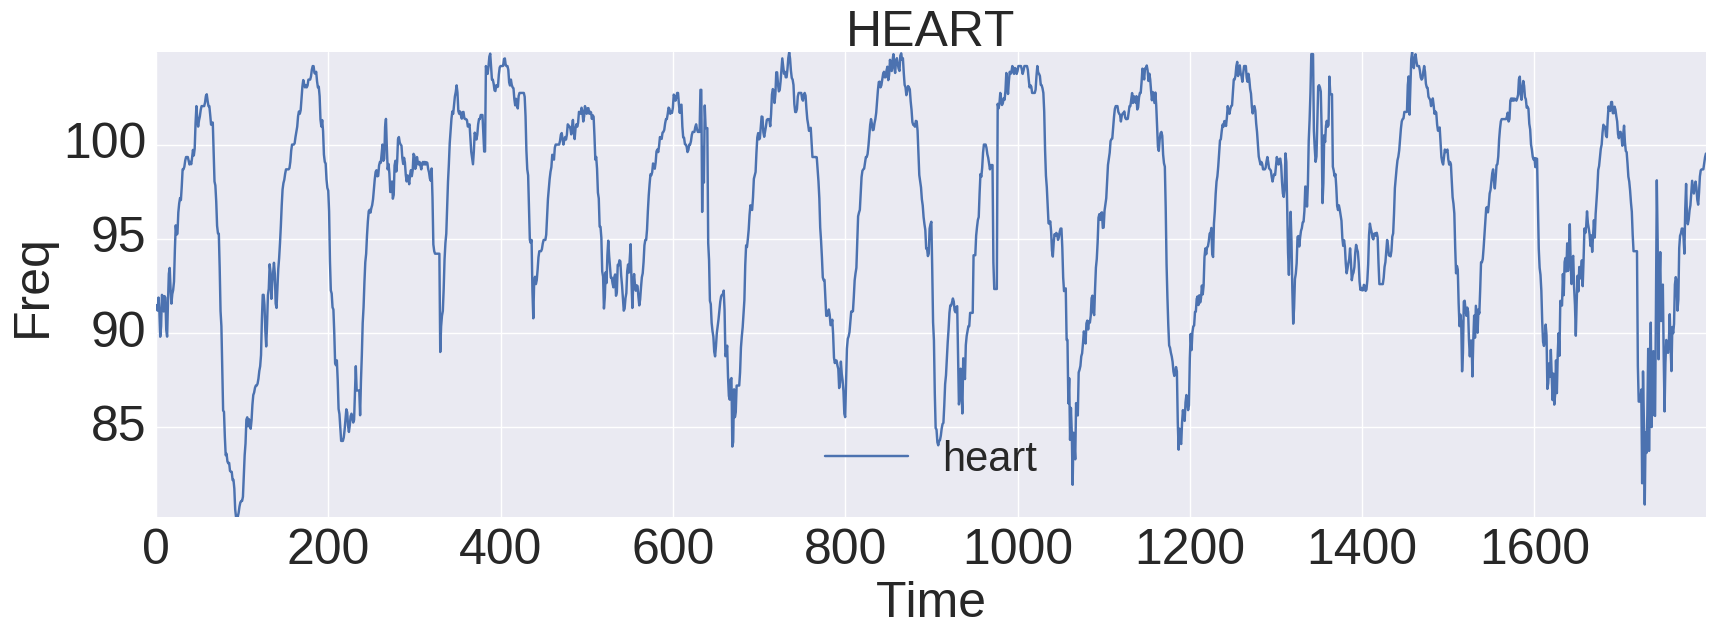

In [1]:
%reload_ext autoreload
%reload_ext line_profiler
%autoreload 2
%matplotlib inline

import g3py as g3

g3.style_big_seaborn()

x, y = g3.data_heart()
g3.plot(x,y,label='heart')
g3.plot_text('HEART','Time','Freq')

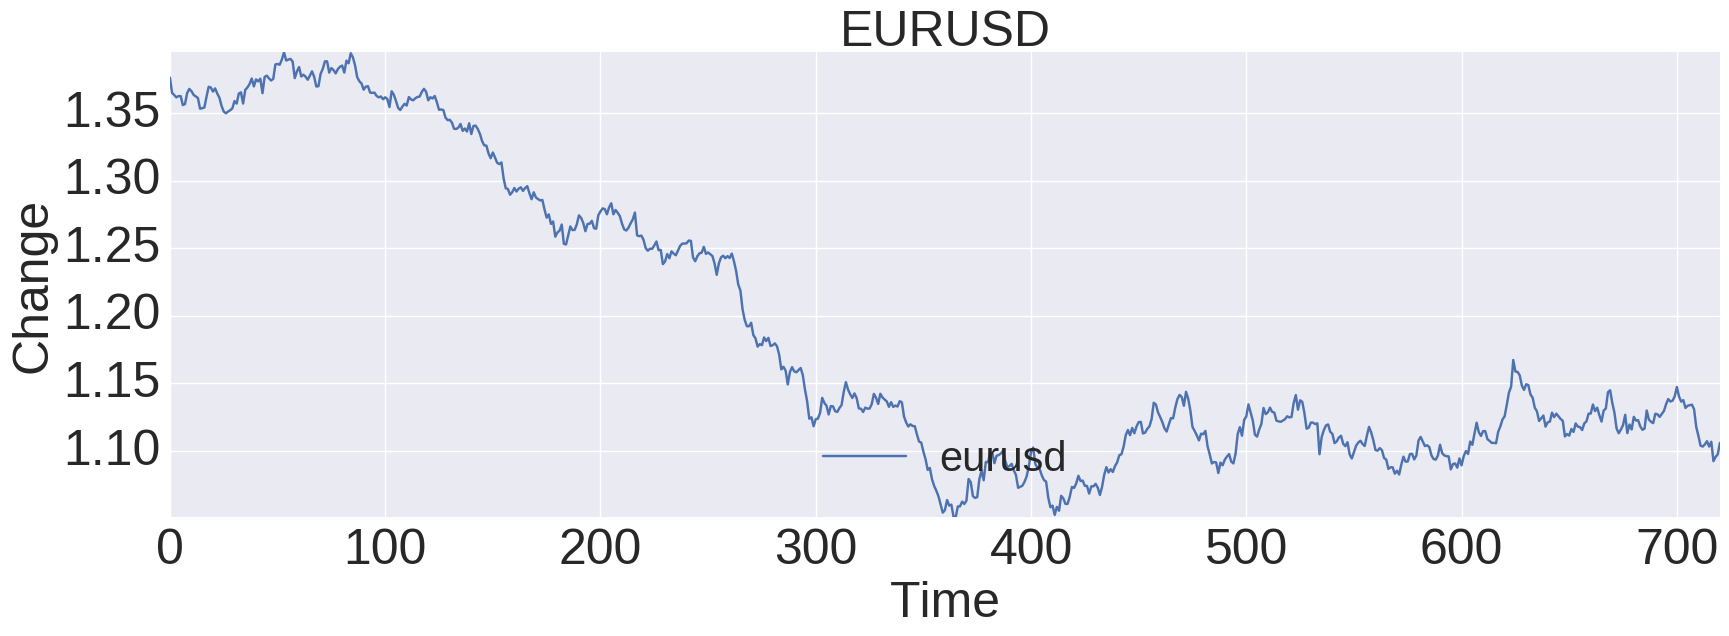

In [2]:
x, y = g3.data_eurusd()
g3.plot(x,y,label='eurusd')
g3.plot_text('EURUSD','Time','Change')

::

    Number of observations: 2225
    Number of variables: 2
    Variable name definitions:

        date - sample date in YYMMDD format
        co2 - CO2 Concentration ppmv

    The data returned by load_pandas contains the dates as the index.



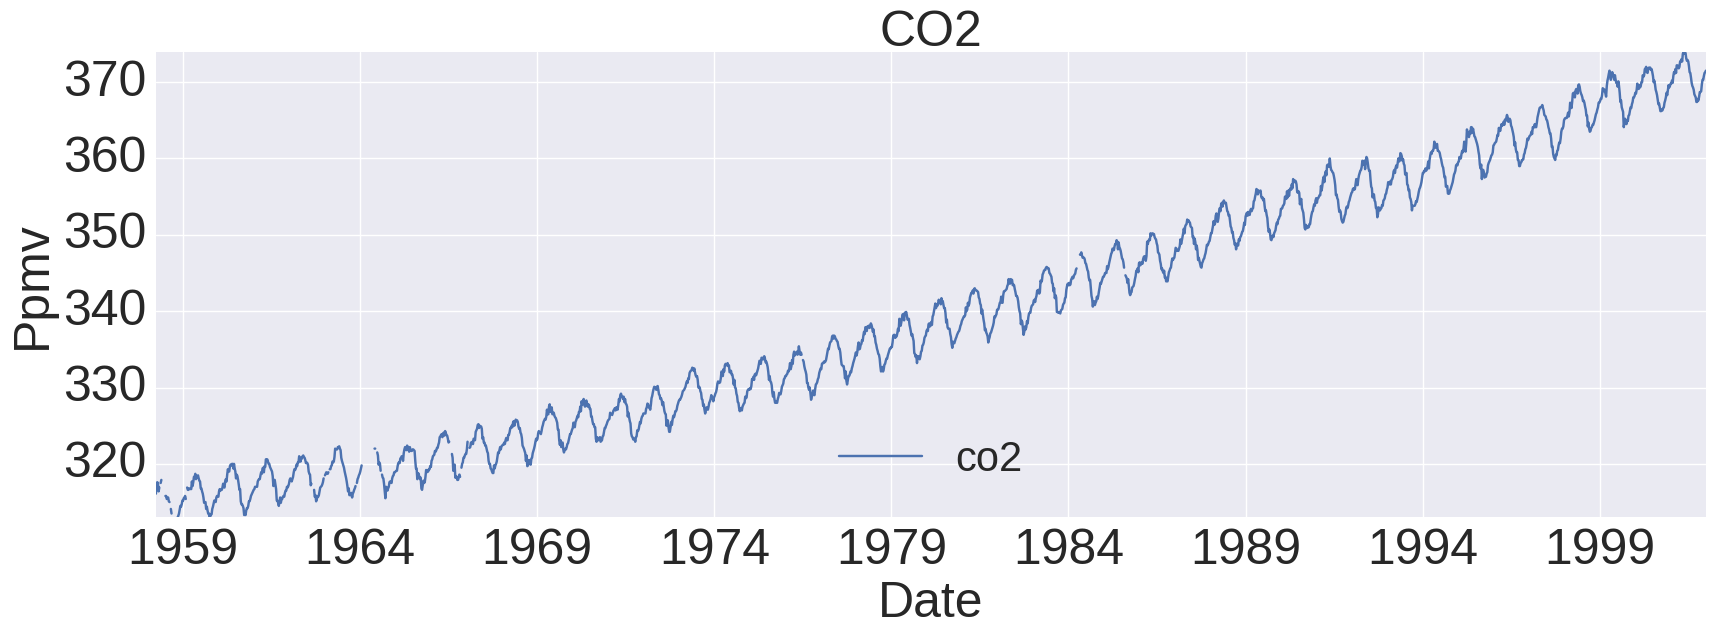

In [3]:
x, y = g3.data_co2()
g3.plot(x,y,label='co2')
g3.plot_text('CO2','Date','Ppmv')

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



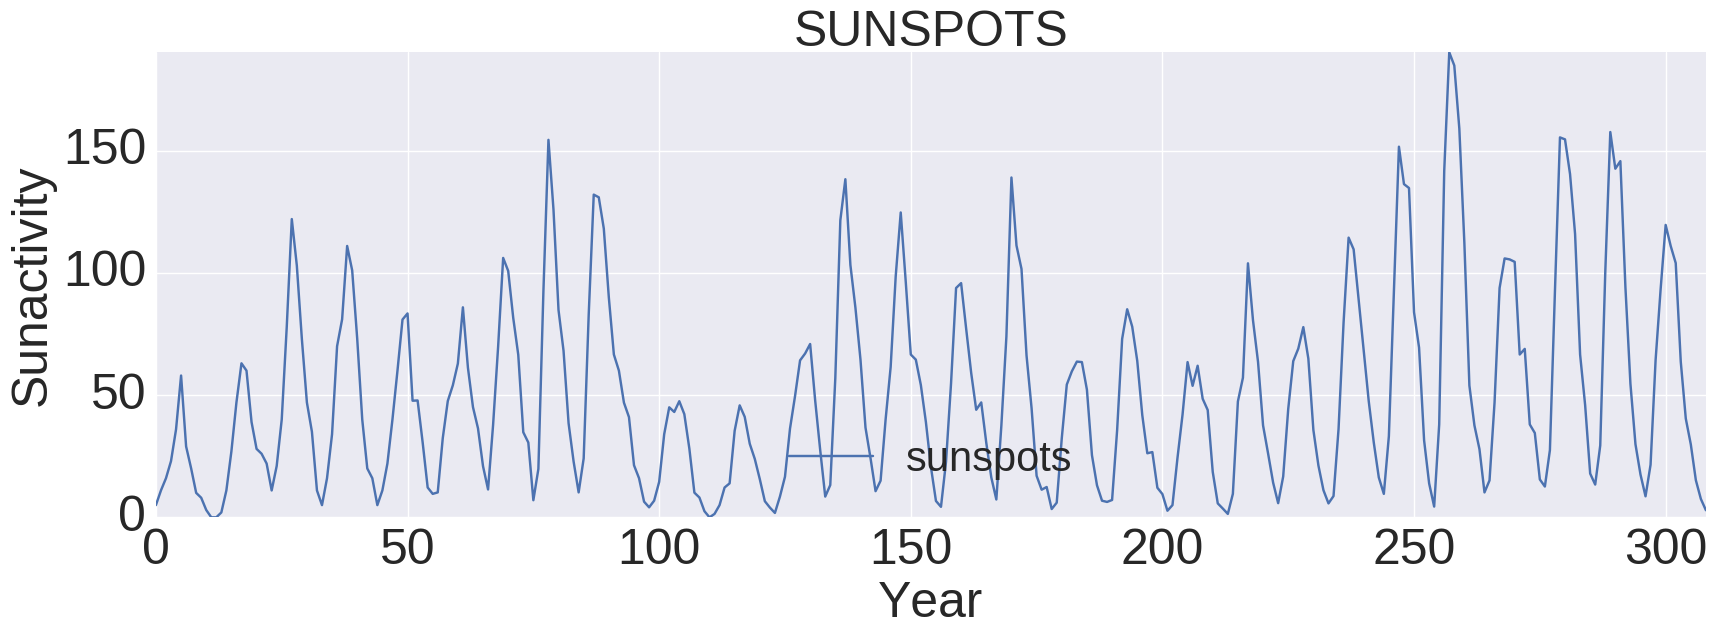

In [4]:
x, y = g3.data_sunspots()
g3.plot(x,y,label='sunspots')
g3.plot_text('SUNSPOTS','Year','Sunactivity')

::

    Number of observations: 235
    Number of variables: 2
    Variable name definitions:
        income - annual household income (Belgian francs)
        foodexp - annual household food expenditure (Belgian francs)



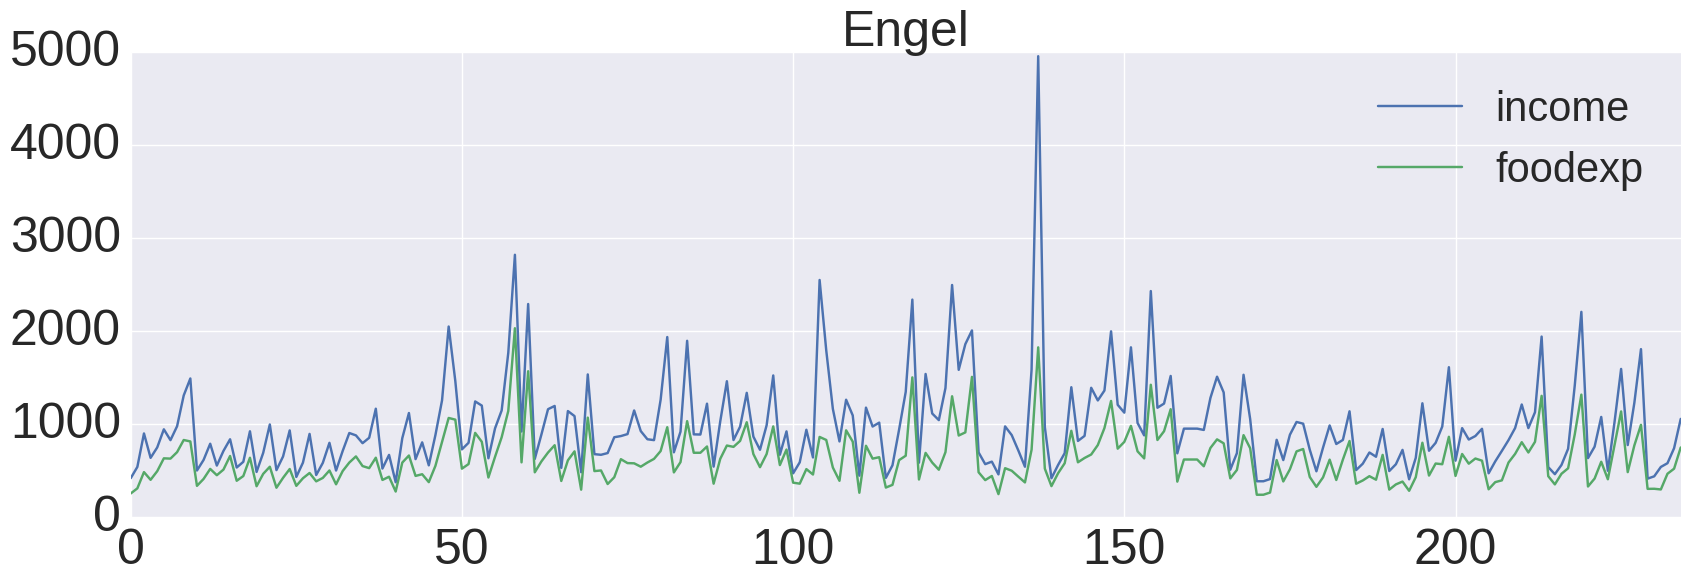

In [5]:
engel = g3.data_engel()
_ = engel.plot(title='Engel')

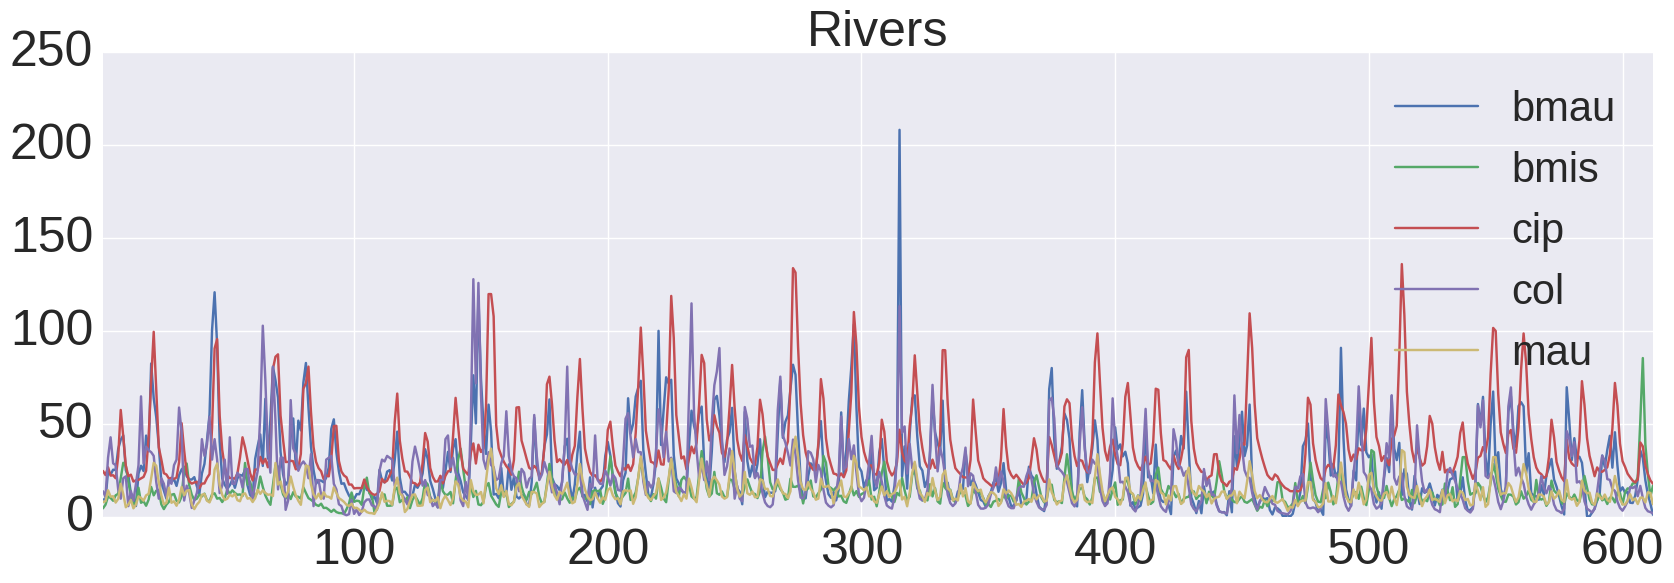

In [6]:
rivers = g3.data_rivers()
_ = rivers.plot(title='Rivers')

abalone


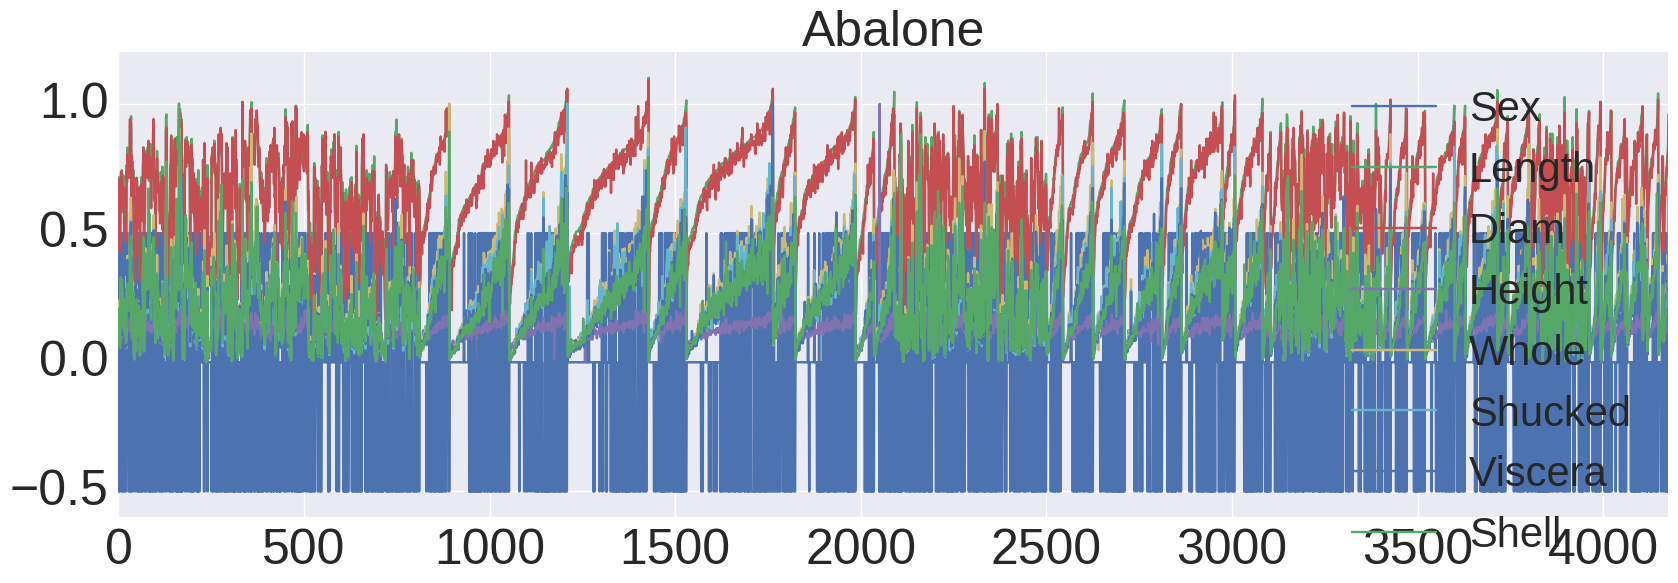

In [7]:
abalone = g3.data_abalone()
abalone = abalone/(abalone.max()-abalone.min())
_ = abalone.plot(title='Abalone')

creep


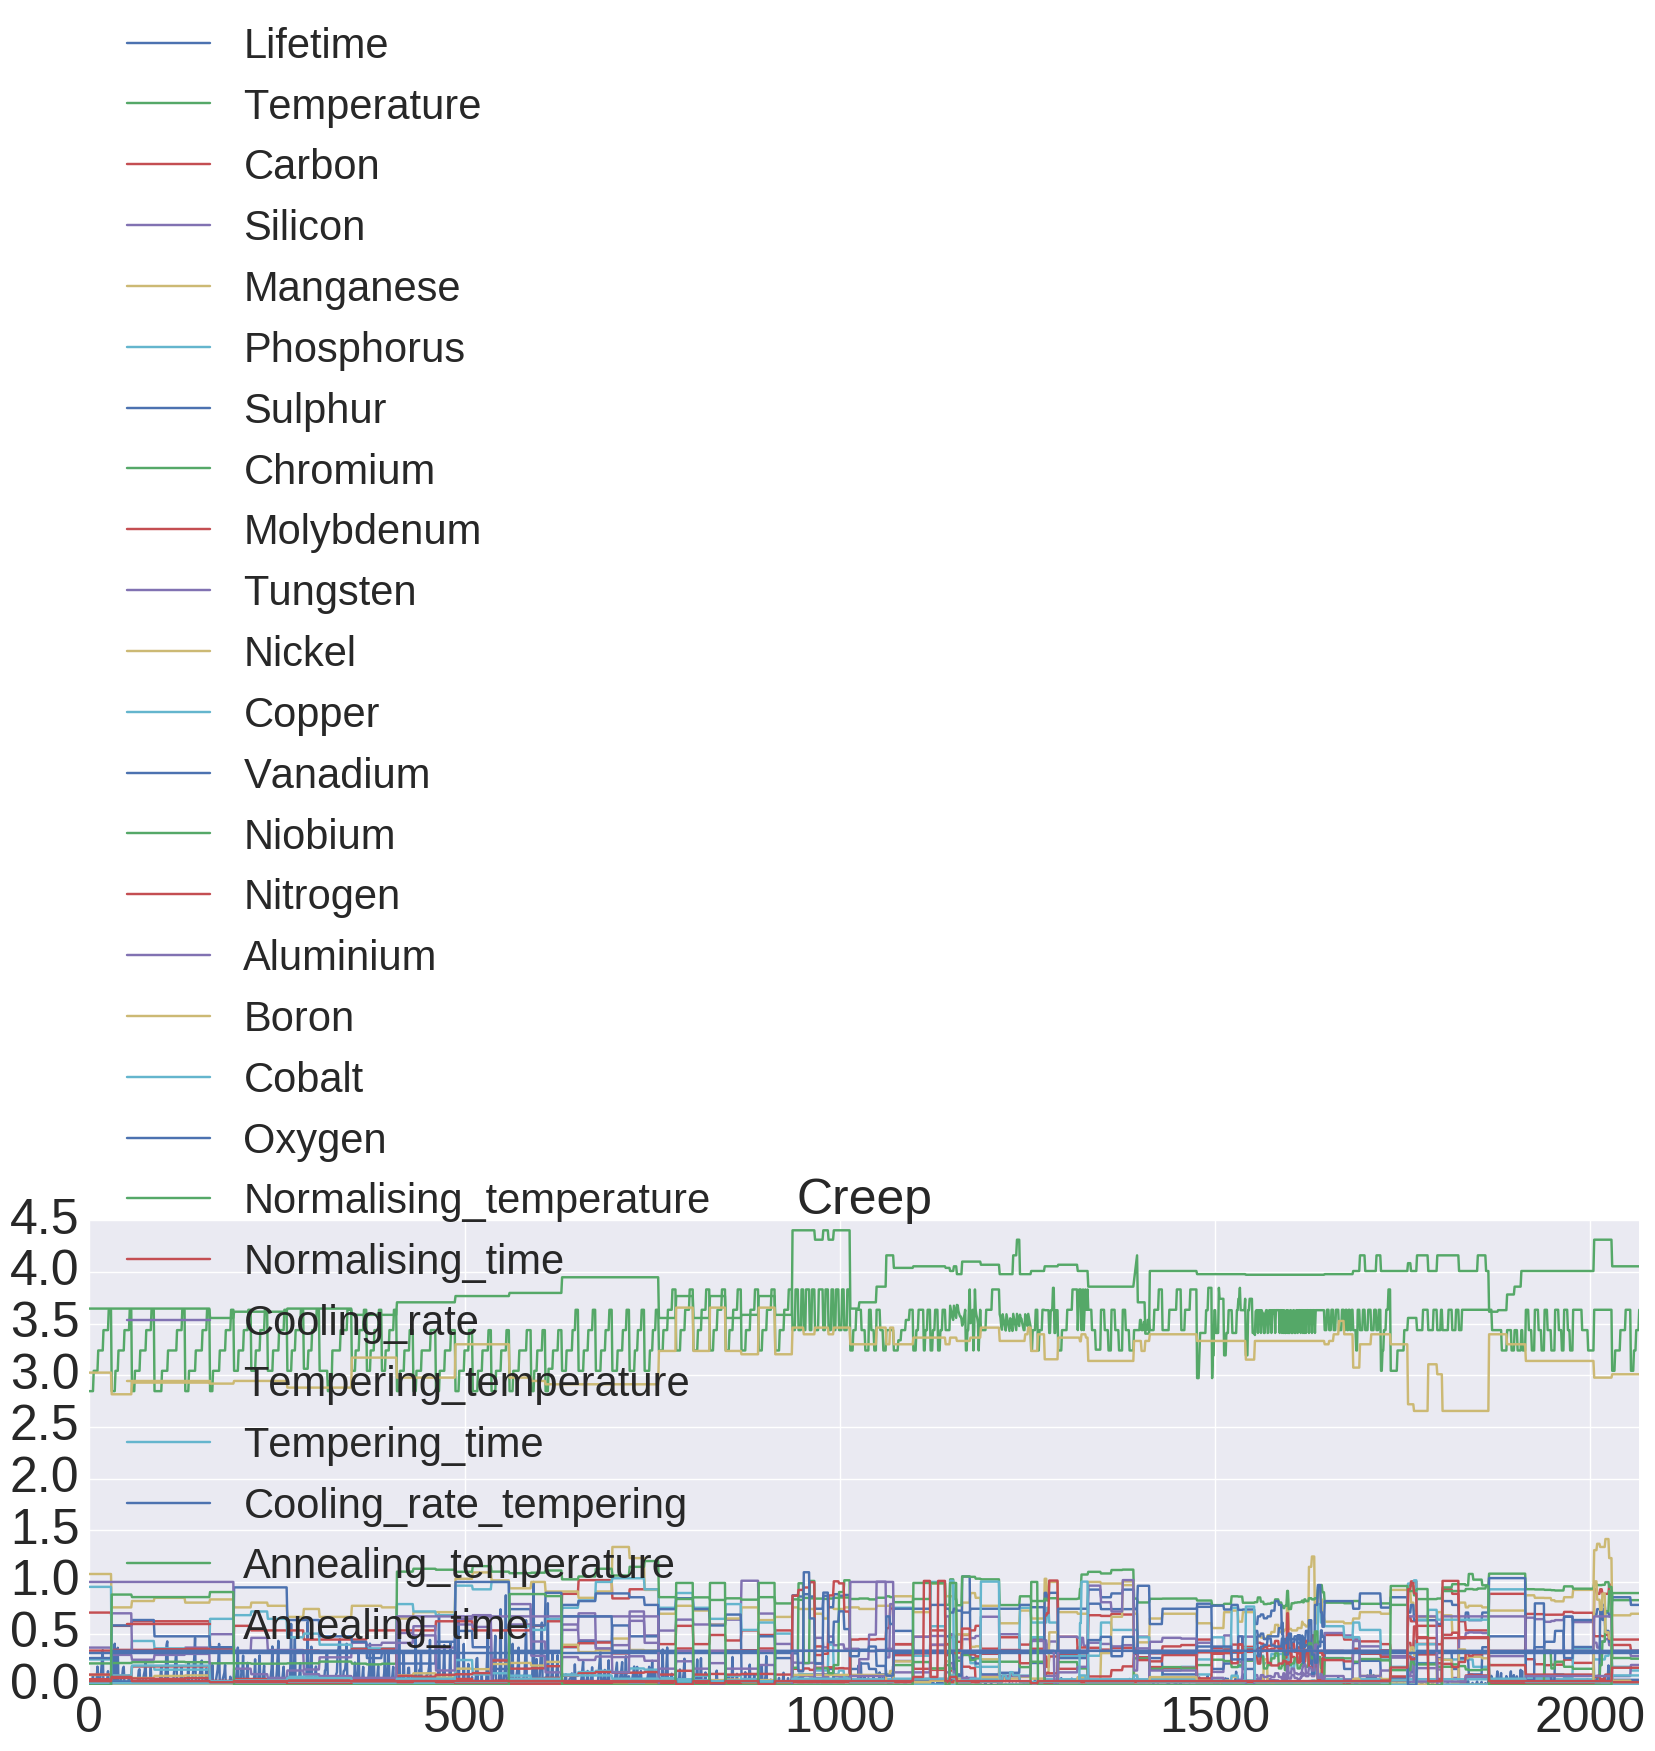

In [8]:
creep = g3.data_creep()
creep = creep/(creep.max()-creep.min())
_ = creep.plot(title='Creep')

ailerons


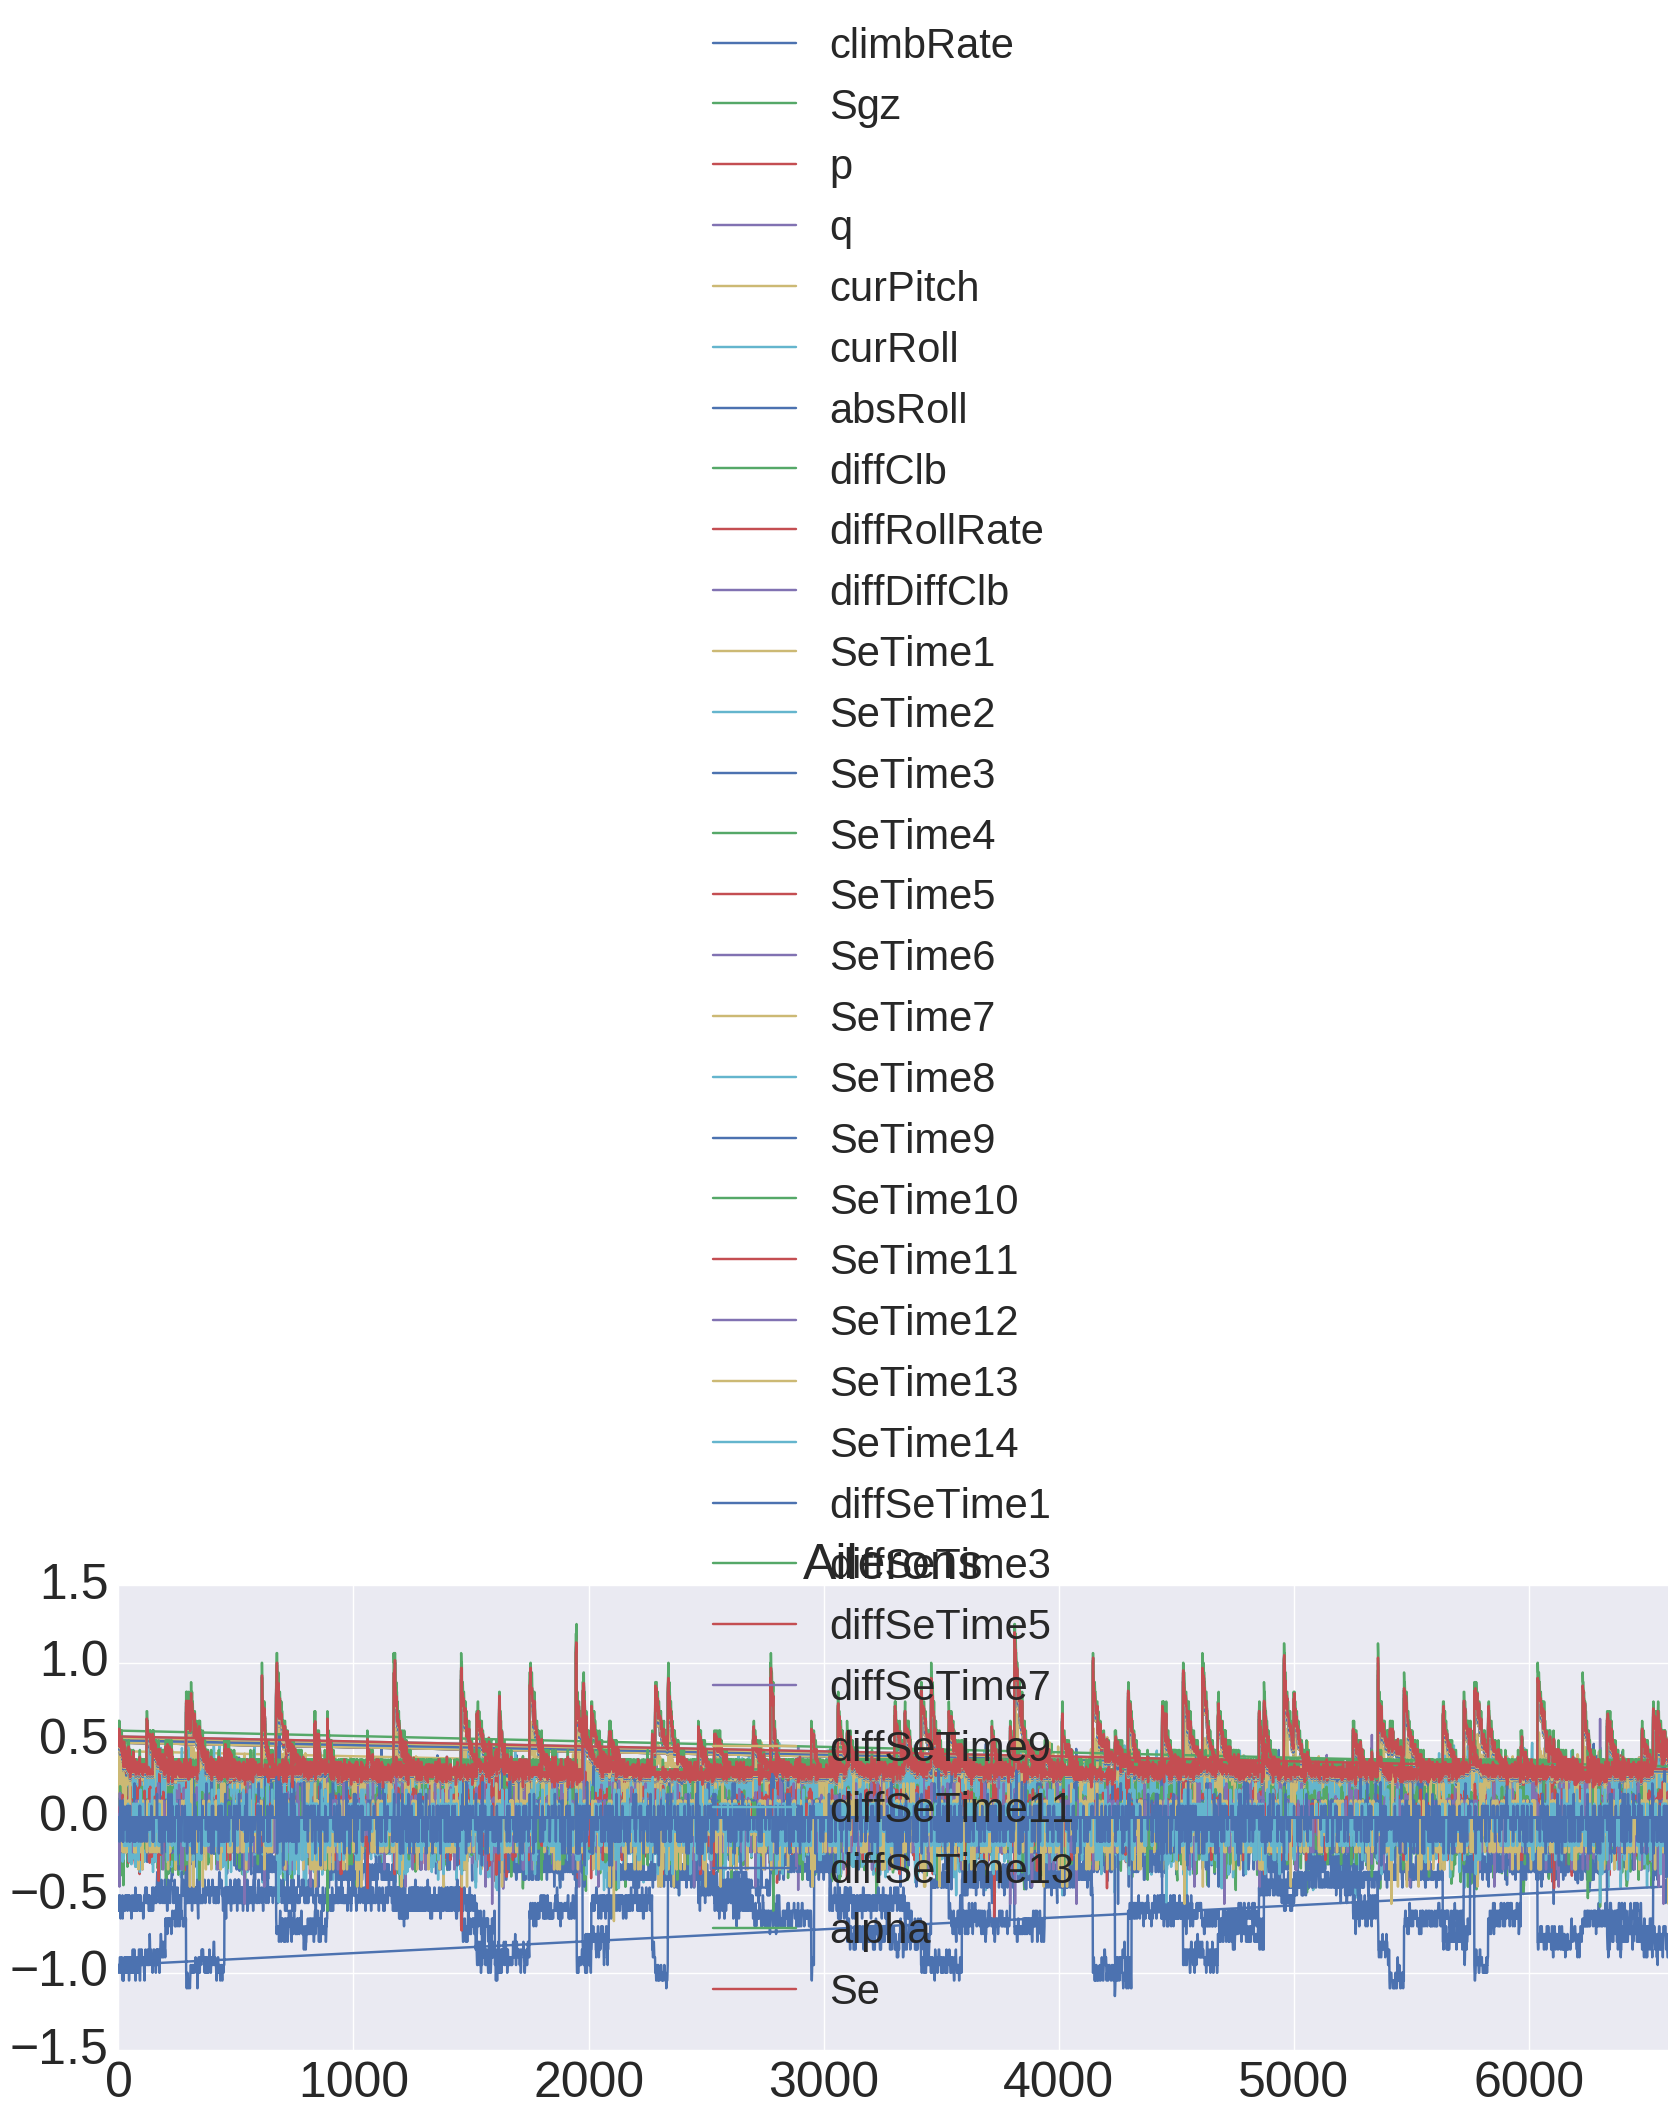

In [9]:
ailerons = g3.data_ailerons()
ailerons = ailerons/(ailerons.max()-ailerons.min())
_ = ailerons.plot(title='Ailerons')

## Test Data

Total: 309 | Obs: 39 (12.62135922330097%)
Total: 309 | Obs: 77 (24.919093851132686%)


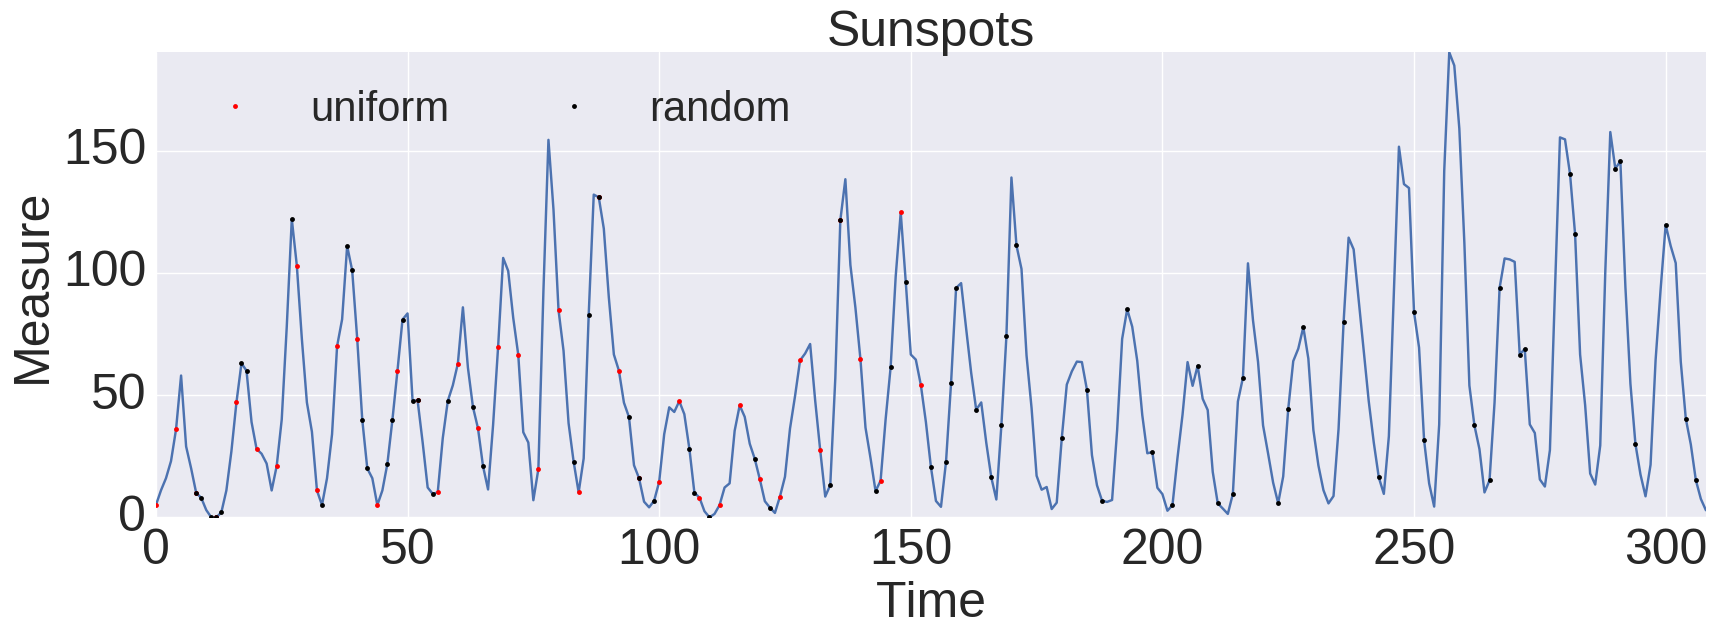

In [10]:
p_obs = 0.25
l_obs = 0.5

g3.plot(x, y)


obs_j, x_obs, y_obs, test_j, x_test, y_test = g3.uniform_obs(x, y, p_obs, l_obs)
g3.plot(x_obs, y_obs,'.r', label = 'uniform')


obs_j, x_obs, y_obs, test_j, x_test, y_test = g3.random_obs(x, y, p_obs, include_min=True)
g3.plot(x_obs, y_obs,'.k', label = 'random')

g3.plot_text('Sunspots', 'Time', 'Measure', loc=2)

## Simulation

In [11]:
gp = g3.GP(x_obs, g3.Bias(), g3.SE(x_obs), name='GP', file='models/05-GP.g3')

wgp1 = g3.TGP(x_obs, g3.Bias(), g3.SE(x_obs), g3.WarpingTanh(y_obs, 1), 
              name='WGP1', file='models/05-WGP1.g3')
wgp2 = g3.TGP(x_obs, g3.Bias(), g3.SE(x_obs), g3.WarpingTanh(y_obs, 2), 
              name='WGP2', file='models/05-WGP2.g3')
wgp3 = g3.TGP(x_obs, g3.Bias(), g3.SE(x_obs), g3.WarpingTanh(y_obs, 3), 
              name='WGP3', file='models/05-WGP3.g3')

tgp1 = g3.TGP(x_obs, g3.Bias(), g3.SE(x_obs), g3.BoxCoxLinear(y_obs), 
              name='TGP1', file='models/05-TGP1.g3')
tgp2 = g3.TGP(x_obs, g3.Bias(), g3.SE(x_obs), g3.ArcsinhLinear(y_obs), 
              name='TGP2', file='models/05-TGP2.g3')
tgp3 = g3.TGP(x_obs, g3.Bias(), g3.SE(x_obs), g3.BoxCoxLinear(y_obs) \
              @ g3.ArcsinhLinear(y_obs), name='TGP3', file='models/05-TGP3.g3')

Loaded model models/05-GP.g3
Loaded model models/05-WGP1.g3
Loaded model models/05-WGP2.g3
Loaded model models/05-WGP3.g3
Loaded model models/05-TGP1.g3
Loaded model models/05-TGP2.g3
Loaded model models/05-TGP3.g3


In [ ]:
models = [gp, wgp1, wgp2, wgp3, tgp1, tgp2, tgp3]
ex = g3.Experiment(models, file='experiments/sunsets.g3x')
ex.data(x, y, p_obs, method='random', include_min=True)
ex.scores(logp=False, mean=True, variance=True)
ex.model_selection(find_MAP=True, points=5, powell=False, master=gp)
ex.describe()

Not found experiment in experiments/sunsets.g3x


{'data_limit': 1.0,
 'data_method': <function g3py.libs.data.random_obs>,
 'data_min': True,
 'data_p': 0.25,
 'data_x': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
    

In [ ]:
ex.run(n_simulations=10)
ex.save()

Total: 309 | Obs: 77 (24.919093851132686%)
Starting function value (-logp): 395.137

start1_bfgs
         Current function value: 371.627747
         Iterations: 16
         Function evaluations: 103
         Gradient evaluations: 91

start2_bfgs
         Current function value: 371.627747
         Iterations: 16
         Function evaluations: 103
         Gradient evaluations: 91

start3_bfgs
         Current function value: 371.627777
         Iterations: 16
         Function evaluations: 96
         Gradient evaluations: 84

start4_bfgs
         Current function value: 371.627777
         Iterations: 13
         Function evaluations: 93
         Gradient evaluations: 82

start5_bfgs
         Current function value: 371.627777
         Iterations: 14
         Function evaluations: 96
         Gradient evaluations: 84

start6_bfgs
         Current function value: 371.627777
         Iterations: 18
         Function evaluations: 102
         Gradient evaluations: 90
Starting function v

/opt/anaconda3/lib/python3.5/site-packages/theano/gradient.py:539: UserWarning: grad method was asked to compute the gradient with respect to a variable that is not part of the computational graph of the cost, or is used only by a non-differentiable operator: WGP2_WarpingTanh_c
  handle_disconnected(elem)
/opt/anaconda3/lib/python3.5/site-packages/theano/gradient.py:565: UserWarning: grad method was asked to compute the gradient with respect to a variable that is not part of the computational graph of the cost, or is used only by a non-differentiable operator: <DisconnectedType>
  handle_disconnected(rval[i])
/opt/anaconda3/lib/python3.5/site-packages/theano/gradient.py:539: UserWarning: grad method was asked to compute the gradient with respect to a variable that is not part of the computational graph of the cost, or is used only by a non-differentiable operator: WGP2_WarpingTanh_b_log_
  handle_disconnected(elem)
/opt/anaconda3/lib/python3.5/site-packages/theano/gradient.py:539: User


start4_bfgs
         Current function value: 351.814545
         Iterations: 37
         Function evaluations: 189
         Gradient evaluations: 176

start5_bfgs
         Current function value: 351.712128
         Iterations: 222
         Function evaluations: 353
         Gradient evaluations: 342

start6_bfgs
         Current function value: 351.830078
         Iterations: 42
         Function evaluations: 141
         Gradient evaluations: 129
Starting function value (-logp): 394.678

start1_bfgs
         Current function value: 351.749146
         Iterations: 54
         Function evaluations: 144
         Gradient evaluations: 132

start2_bfgs
         Current function value: 351.749146
         Iterations: 54
         Function evaluations: 144
         Gradient evaluations: 132

start3_bfgs
         Current function value: 351.858215
         Iterations: 49
         Function evaluations: 145
         Gradient evaluations: 134

start4_bfgs
         Current function value: 351.71

In [ ]:
ex.results()

In [ ]:
ex.results(model='GP').describe().T

In [ ]:
ex.results(model=['WGP1','WGP2','WGP3']).describe().T

In [ ]:
ex.results(model=['TGP1','TGP2','TGP3']).describe().T